**Engy-5310** Computational Continuum Transport Phenomena, UMass Lowell, Chem. Eng. Nuclear Program Spring 2021; Prof. V. F. de Almeida

# Neutron Diffusion on a Spherical Domain with a Free Surface Boundary
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

**Student(s):**  <br>
**Course:** Engy-5310 Computational Continuum Transport Phenomena  <br>
**Mentor:** 

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**27Mar2021**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Problem Statement](#problem)
* [Objectives](#obj)
* [Approach](#app)
 + [Analytical Solution](#analyticalsol)
 + [Weak Form of Problem Statement](#weakform)
 + [MOOSE Kernels](#kernels)
 + [Setup](#setup)
    - [One-Group Energy](#onegroupenergy)
* [Results and Analysis](#ranalysis)
* [Conclusions](#conclusions)
* [References](#refs)
---

## [Introduction](#toc)<a id="intro"></a>

- Introduction to motivation for neutron transport problems

## [Problem Statement](#toc)<a id="problem"></a>
#### Outline:
1. Define strong form of the PDE and analytic approach for neutron diffusion.
    - Define the point source solution for a homogenous and attenuating medium.
    - Define the integral transport equation solution for the point source solution. 
2. Define the Galerkin weak form of the problem
    - Set the integral weak form for the FEM
    - Define the boundary conditions for 1 group and multi group diffusion equations.
3. Define the diffusion equation differences for each approximation.

### [Strong Form of Problem Statement](#toc)<a id="strongform"></a>

This investigation looks to determine how FEM computation of the neutron diffusion equation compare to linear transport theory given standard assumptions about the definition of the diffusion coefficient in homogenous mediums far from and close to voids. Defining diffusion coefficients for neutron transport is an active field of research and includes approximations such as isotropic scattering, linear in angle, nonlocal weighting of nearby average transport properties, Monte Carlo study and experiment.

The multi-group (energy group) time independent neutron diffusion equation (NDE) in written assuming azimuthal symmetry as

Compute $\Phi_g:[r_\text{i},r_\text{o}]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
  \nabla \cdot D_g \nabla \Phi_g(r) - \Sigma_{g,r} \Phi_g(r) + S_{g'\rightarrow g} &= 0 \\
   J_{n,g}(r_\text{i}) &= \Phi_{0,g}, \\
   J_{n,g}(r_\text{o}) &= \frac{\alpha}{2}\Phi_g(r_\text{o}).
\end{align*}

where the source term $S_{g'\rightarrow g} := \sum_{g'=1}^{G} \int_\Omega \Sigma_{s,g'\rightarrow g}\, f_{s,g'\rightarrow g}(\mu)\,d\Omega$ is the group down-scattering contribution for each group $g$. This will be defined in greater detail later

The neutron scalar flux is: $\Phi(r)\ [n/cm^2 s]$. The total macroscopic cross section is: $\Sigma_{tot} = \Sigma_{non-el} + \Sigma_{el} \approx \Sigma_{abs} + \Sigma_{el}$

And the removal cross section for the multi group cross section is $ \Sigma_{r} = \Sigma_{tot} - \bar{\mu}\Sigma_{s} $

### Domain
Describe domain here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def show_domain(screenshot=False):
    import pyvista as pv
    pv.set_plot_theme('paraview')

    radius_i = 1
    radius_o = 20 * radius_i
    outer = pv.Sphere(center=(0,0,0), direction=(0,0,1), radius=radius_o)
    inner = pv.Sphere(center=(0,0,0), direction=(0,0,1), radius=radius_i)

    plo = pv.Plotter(notebook=True, shape=(1,1)) 

    plo.subplot(0,0)
    plo.add_mesh(outer, color='yellow', opacity=0.99,)
    plo.add_mesh(inner, color='red', opacity=1)
    plo.add_axes(xlabel='R', ylabel='Theta', zlabel='Phi')

    cpos = plo.show(window_size=[800, 600])
    if screenshot:
        plo.screenshot('domain.png')

In [2]:
show_domain()

ModuleNotFoundError: No module named 'pyvista'

- In the NDE boundary conditions above, Dirichlet boundary conditions are assumed for the neutron density from a point source. Alternatively, interface coupling may be considered between a small sphere's inner surface with the second domain where Neumann BC for neutron current $J$ are given. 
- For the Galerkin FEM formulation, this is equivalent to the asymptotic assumption for the integral linear transport method as long as the inner sphere's source is not infinity. 

## [Approach](#toc)<a id="app"></a>

### [Analytic Solution - 1 Group](#toc)<a id="analyticalsol"></a> 

A general solution is commonly given without the asymptotic condition as:

\begin{align*}
    \Phi(r) =  \frac{S_0 e^{-\kappa r}}{4\pi Dr} \ \ \ (2)
\end{align*}

On the other hand, linear transport theory does provide a result at the asymptotic limit for moderately absorbing mediums given that the source flux is not infinity. The integral transport equation is written:


\begin{align*}
    \Phi(r) = \int dV\  \frac{S_0 e^{- \Sigma_t r}}{4 \pi r^2} [c \Sigma_t \Phi(r') + S_0 \delta(r')] \ \ \ (3)
\end{align*}

In this solution we will currently assume $S_0 = \Phi_0$ for a single distributed source.

### [Weak Form of Problem Statement](#toc)<a id="weakform"></a> 

The Galerkin weak formulation of the [strong form](#strongform) is as follows for Dirichlet BC. Find $\Phi_{g=1} \in H^1\!\bigl([r_\text{i},r_\text{o}]\bigr)$ and $\Phi_{g=2} \in H^1\!\bigl([r_\text{i},r_\text{o}]\bigr)$
so that 

\begin{align*}
\int\limits_a^b D\, \Phi_1'(r)\,\psi'(r)\,dr - \int\limits_a^b S(\Phi_1, \Phi_2)\,\psi(r)\,dr &= 0 \quad \forall \quad \psi \in H^1_0\!\bigl([a,b]\bigr), \text{and}
\end{align*}

where $H^1\!\bigl([r_\text{i},r_\text{o}]\bigr) := \bigl\{ \Phi:[r_\text{i},r_\text{o}]\subset\Reals\rightarrow \Reals \mid \int_{r_i}^{r_o} \Phi'^2\,dr < \infty\bigr\}$ and $H^1_0\!\bigl([r_\text{i},r_\text{o}]\bigr) := \bigl\{ \psi \mid \psi \in H^1(r_i,r_o), \psi(r_i) = 0, \psi(r_o) =0 \bigr\}$. Both function sets as just defined are Hilbert spaces. The function $\psi$ is called a test function. Because $\psi$, $\Phi_{g=1}$, $\Phi_{g=2}$ are sought in very similar sets of functions, this weak form is called Galerkin's weak form.

\begin{align*}
   \psi = \sum_{i=1}^{N} a_n \psi_n   \ \ \ (1B)
\end{align*}


#### [Weak Form of Problem Derivation](#toc)<a id="weakformDerivation"></a> 



1. Multiply NDE by a test function $\psi$.
2. Integrate over spatial and angular domain.
3. Use divergence theorem to set the boundary condition across the domain surface.

The weak form and boundary condition becomes:

\begin{align*}
    ( \nabla \psi, D \nabla \Phi  )\ - < \psi, D \nabla \Phi \cdot \bar{n_b} > +\ (\psi , \Sigma_{tot} \Phi) = 0 \ \ \ (1B)
\end{align*}

This weak form contains the volume and surface integral as written with parenthesis and brackets respectively. The boundary conditions for the partial currents at the surface given as $\Gamma^{\pm}$ must be solved for:

\begin{align*}
    \Gamma^{+} = J^{out}({R_S}) = \nabla \Phi \cdot \bar{n_b}
\end{align*}

\begin{align*}
    \Gamma^{-} = J^{in}({R_S}) = 0
\end{align*}

One option is to use the homogenous Neumann boundary condition, which is equivalent to the Robin boundary condition such that the reflectivity at the boundary is 0 as:

\begin{align*}
    \frac{1}{4} \Phi + \frac{1}{2} D \nabla \Phi \cdot \bar{n_b} = J^{-} = \frac{\Phi}{4} - \frac{J}{2} = \frac{\Phi}{4} - \frac{D \nabla \Phi}{2}
\end{align*}

Solving for the weak form boundary condition and multiplying our test function $\psi$:

\begin{align*}
     \psi (D \nabla \Phi \cdot \bar{n_b}) = \psi( \frac{1}{2} D \nabla \Phi)
\end{align*}

#### [Weak Form Steady State 3 Group NDE for non-multiplying medium](#toc)<a id="weakformResult"></a> 

Assuming no upscattering from group 2 to group 1:

\begin{align*}
    -\nabla \cdot D_1 \nabla \Phi_1(r)  + \Sigma_{r,1} \Phi_1(r) =  - \Sigma_{s,1 \rightarrow 2} \Phi_1(r) \ \ \ (r) 
\end{align*}

\begin{align*}
    -\nabla \cdot D_2 \nabla \Phi_2(r)  + \Sigma_{r,2} \Phi(r) =  \Sigma_{s,1 \rightarrow 2} \Phi_1(r) - \Sigma_{s,2 \rightarrow 3} \Phi_2(r) \ \ \ (r) 
\end{align*}

\begin{align*}
    -\nabla \cdot D_3 \nabla \Phi_3(r)  + \Sigma_{r,3} \Phi(r) =  \Sigma_{s,1 \rightarrow 3} \Phi_1(r) + \Sigma_{s,2 \rightarrow 3} \Phi_2(r)  \ \ \ (r) 
\end{align*}


\begin{align*}
\int\limits_{r_i}^{r_o} D_1\, \Phi_1'(r)\,\psi'(r)\,dr - \int\limits_{r_i}^{r_o} \Sigma_{r,1} \Phi_1(r)\,\psi(r)\,dr - \int\limits_{r_i}^{r_o} \Sigma_{s,1 \rightarrow 2} \Phi_1(r)\,\psi(r)\,dr -\int\limits_{r_i}^{r_o} \Sigma_{s,1 \rightarrow 3} \Phi_1(r)\,\psi(r)\,dr  &= 0 \quad \forall \quad \psi \in H^1_0\!\bigl([r_i,r_o]\bigr), \text{and}
 \\
\int\limits_{r_i}^{r_o} D_2\, \Phi_2'(r)\,\psi'(r)\,dr - \int\limits_{r_i}^{r_o} \Sigma_{r,2} \Phi_2(r)\,\psi(r)\,dr + \int\limits_{r_i}^{r_o} \Sigma_{s,1 \rightarrow 2} \Phi_2(r)\,\psi(r)\,dr -\int\limits_{r_i}^{r_o} \Sigma_{s,2 \rightarrow 3} \Phi_2(r)\,\psi(r)\,dr  &= 0 \quad \forall \quad \psi \in H^1_0\!\bigl([r_i,r_o]\bigr), \text{and}
 \\
\int\limits_{r_i}^{r_o} D_3\, \Phi_3'(r)\,\psi'(r)\,dr - \int\limits_{r_i}^{r_o} \Sigma_{r,3} \Phi_3(r)\,\psi(r)\,dr + \int\limits_{r_i}^{r_o} \Sigma_{s,1 \rightarrow 3} \Phi_1(r)\,\psi(r)\,dr +\int\limits_{r_i}^{r_o} \Sigma_{s,2 \rightarrow 3} \Phi_2(r)\,\psi(r)\,dr  &= 0 \quad \forall \quad \psi \in H^1_0\!\bigl([r_i,r_o]\bigr)
\end{align*}


#### [Point source approximation](#toc)<a id="weakformApprox"></a> 

Here we will assume that Dirichlet BC may be applied to an isotropic point neutron source in terms of neutron density at the origin. 
    

### [MOOSE Kernels](#toc)<a id="kernels"></a>

The following MOOSE kernels were implemented to solve the one group [weak form](#weakform):
1. Diffusion term: $D \nabla \Phi \cdot \nabla \psi$
 + [interface](./include/kernels/DiffusionTerm.h) and [implementation](./src/kernels/DiffusionTerm.C).
2. Absorption (removal) term: $ \Sigma_{r}\Phi \psi = (\Sigma_{tot} - \bar{\mu}\Sigma_{s})\Phi \psi$
 + [interface](./include/kernels/AbsorptionTerm.h) and [implementation](./src/kernels/AbsorptionTerm.C).
3. Source term: $ S(\Phi_g) = \sum_{n \neq g}^{G} \Sigma_{s,n \rightarrow g} \ \Phi_n $
 + [interface](./include/kernels/SourceTerm.h) and [implementation](./src/kernels/SourceTerm.C).

### [Setup](#toc)<a id="setup"></a>
A simplified version of the NDE assumes a scalar velocity, allowing a decoupling of the neutron flux to calculate the neutron density $n(r)$: 

$$ \Phi(r) = v n(r)$$

This is accomplished with a known flux, and calculating the relativistic neutron velocity using the particle's kinetic energy, E and speed of light $c = 3\times 10^{10} \ cm/s$:

$$ \frac{v}{c} = \left( 1- \left( \frac{1}{\frac{E}{938.5} + 1}  \right)^2 \right)^{1/2} $$

#### [One-Group Energy](#toc)<a id="onegroupenergy"></a>

## [Results and Analysis](#toc)<a id="ranalysis"></a>

- Text...

In [ ]:
'''Plot function for FEM Solution'''

def plot_solution(df, 
                  title='No Title', 
                  basis_functions_type='No basis functions type',
                  flux_basis_functions_type='No basis functions type'):
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.style.use('dark_background')

    (fig, ax1) = plt.subplots(1, figsize=(14, 5))

    ax1.plot(df['x'], df['u'].abs()*2.4e9,'r*-',label=basis_functions_type)

    ax1.set_xlabel(r'$x$ [cm]', fontsize=18)
    ax1.set_ylabel(r'$u_h(x)$ [g/cc]', fontsize=18, color='red')
    ax1.set_xscale('log')
    ax1.set_yscale('log')

    ax1.tick_params(axis='y', labelcolor='red', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='center left', fontsize=12)
    ax1.set_ylim(1e-12,1e12)
    ax1.grid(True)

    plt.title(title, fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

In [ ]:
# !./neutron-ball-opt -i input2G.hit
# mooOut1G = np.genfromtxt('./output2G_x-data_0002.csv',delimiter=",",comments = '#')




Framework Information:
MOOSE Version:           git commit 39ab14682c on 2021-05-04
LibMesh Version:         
PETSc Version:           3.14.2
SLEPc Version:           3.14.0
Current Time:            Mon May 10 00:23:06 2021
Executable Timestamp:    Sun May  9 15:58:02 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   
    Total:                 9001
    Local:                 9001
  Elems:                   
    Total:                 3000
    Local:                 3000
  Num Subdomains:          1
  Num Partitions:          1

Nonlinear System:
  Num DOFs:                27003
  Num Local DOFs:          27003
  Variables:               { "u1" "u2" "u3" } 
  Finite Element Types:    "LAGRANGE" 
  Approximation Orders:    "THIRD" 

Execution Information:
  Executioner:             Steady
  Solver Mode:             NEWTON
  PETSc

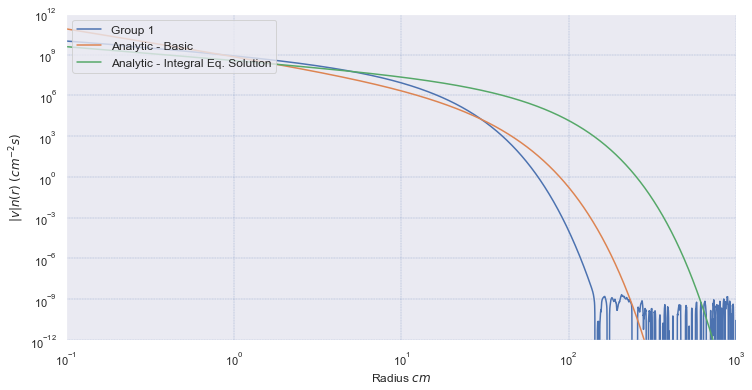

In [17]:
!./neutron-ball-opt -i input-test.hit
import pandas as pd
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns
# Apply the default theme
sns.set_theme()
df = pd.read_csv('output1G_x-data_0002.csv')
data = df.to_numpy();
data[:,1:4]*=2.4e9
plt.plot(data[:,4], data[:,1],label="Group 1")
# plt.plot(data[:,4], data[:,2],label="Group 2")
# plt.plot(data[:,4], data[:,3],label="Group 3")
"""Analytic solution"""
_Phi_a = lambda S0,SigR, r: S0*np.exp(-SigR*r)/(4*np.pi*r**2)
_Phi_b = lambda S0,Diff,SigR,r: S0*np.exp(-SigR*r)/(4*np.pi*r*Diff)
# 1-Group versions a and b
_Phi1a = _Phi_a(2.393e9*4.17, 0.13, data[:,4])

sigR_alt = 0.16-0.8*0.13
_Phi1b = _Phi_b(2.393e9*4.17,2.04,sigR_alt, data[:,4])

plt.plot(data[:,4], _Phi1a,label="Analytic - Basic")
plt.plot(data[:,4], _Phi1b,label="Analytic - Integral Eq. Solution")

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-1, 1e3])
plt.ylim([1e-12, 1e12])
plt.ylabel('$|v| n(r)\ (cm^{-2}s)$')
plt.xlabel('Radius $cm$')
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.rcParams['figure.figsize'] = [12, 6]
plt.legend(loc=2, fontsize = 'medium')



Framework Information:
MOOSE Version:           git commit 39ab14682c on 2021-05-04
LibMesh Version:         
PETSc Version:           3.14.2
SLEPc Version:           3.14.0
Current Time:            Mon May 10 00:08:21 2021
Executable Timestamp:    Sun May  9 15:58:02 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   
    Total:                 36001
    Local:                 36001
  Elems:                   
    Total:                 12000
    Local:                 12000
  Num Subdomains:          1
  Num Partitions:          1

Nonlinear System:
  Num DOFs:                108003
  Num Local DOFs:          108003
  Variables:               { "u1" "u2" "u3" } 
  Finite Element Types:    "LAGRANGE" 
  Approximation Orders:    "THIRD" 

Execution Information:
  Executioner:             Steady
  Solver Mode:             NEWTON
 

- Text...

## [Conclusions](#toc)<a id="conclusions"></a>

- Text...

- Text...

## [References](#toc)<a id="refs"></a>

- [1] V. F. de Almeida, [*Engy-5310: Computational Continuum Transport Phenomena*](https://github.com/dpploy/engy-5310), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).
- [2] Multiphysics Object-Oriented Simulation Environment [(MOOSE)](https://mooseframework.org)
- [3] author, [reference]()
- [4] author, [reference]()



Framework Information:
MOOSE Version:           git commit 39ab14682c on 2021-05-04
LibMesh Version:         
PETSc Version:           3.14.2
SLEPc Version:           3.14.0
Current Time:            Mon May 10 00:23:14 2021
Executable Timestamp:    Sun May  9 15:58:02 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   
    Total:                 15001
    Local:                 15001
  Elems:                   
    Total:                 5000
    Local:                 5000
  Num Subdomains:          1
  Num Partitions:          1

Nonlinear System:
  Num DOFs:                45003
  Num Local DOFs:          45003
  Variables:               { "u1" "u2" "u3" } 
  Finite Element Types:    "LAGRANGE" 
  Approximation Orders:    "THIRD" 

Execution Information:
  Executioner:             Steady
  Solver Mode:             NEWTON
  PET

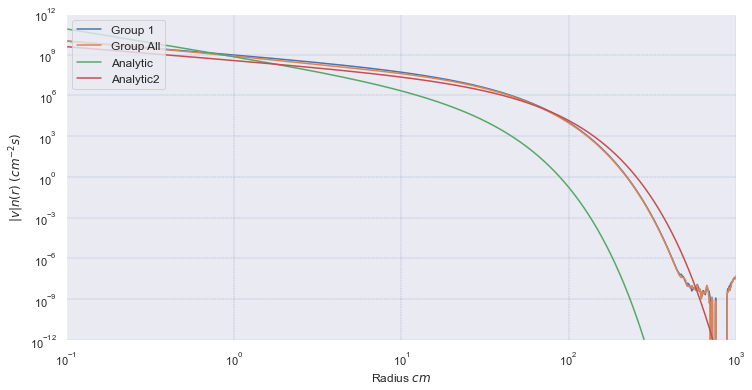

In [18]:
# 1/(0.16-0.8*0.13)/3
!./neutron-ball-opt -i input2G.hit
import pandas as pd
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns
# Apply the default theme
sns.set_theme()
df = pd.read_csv('output1G_x-data_0002.csv')
data = df.to_numpy();
data[:,1:4]*=2.4e9
plt.plot(data[:,4], data[:,1],label="Group 1")
plt.plot(data[:,4], data[:,1]+data[:,2]+data[:,3],label="Group All")
# plt.plot(data[:,4], data[:,3],label="Group 3")
"""Analytic solution"""
_Phi_a = lambda S0,SigR, r: S0*np.exp(-SigR*r)/(4*np.pi*r**2)
_Phi_b = lambda S0,Diff,SigR,r: S0*np.exp(-SigR*r)/(4*np.pi*r*Diff)
# 1-Group versions a and b
_Phi1a = _Phi_a(2.393e9*4.17, 0.13, data[:,4])

sigR_alt = 0.16-0.8*0.13
_Phi1b = _Phi_b(2.393e9*4.17,2.04,sigR_alt, data[:,4])

plt.plot(data[:,4], _Phi1a,label="Analytic")
plt.plot(data[:,4], _Phi1b,label="Analytic2")

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-1, 1e3])
plt.ylim([1e-12, 1e12])
plt.ylabel('$|v| n(r)\ (cm^{-2}s)$')
plt.xlabel('Radius $cm$')
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.rcParams['figure.figsize'] = [12, 6]
plt.legend(loc=2, fontsize = 'medium')